# 簡單線性回歸

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 1. 模型建立

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


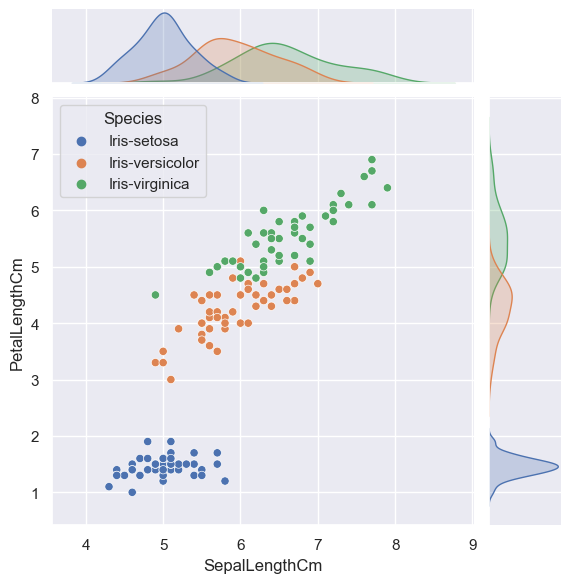

In [2]:
df_iris = pd.read_csv('./datasets/iris.csv')
print(df_iris.head())
# 觀察花萼長度與花瓣長度的關係
sns.jointplot(x='SepalLengthCm', y='PetalLengthCm', data=df_iris, hue='Species')

In [3]:
'''
想觀察是否花瓣長度與花萼長度有線性關係, 我們可使用一元線性迴歸模型
花萼長度(應變數) = 斜率 * 花瓣長度(自變數) + 截距項 (y = b1x + b0)
'''

import statsmodels.formula.api as smf
import statsmodels.api as sm
# Ordinary Least Square (OLS) 普通最小平方法
lm_model = smf.ols(formula = "SepalLengthCm ~ PetalLengthCm", data=df_iris).fit()

print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           1.04e-47
Time:                        02:10:21   Log-Likelihood:                -77.020
No. Observations:                 150   AIC:                             158.0
Df Residuals:                     148   BIC:                             164.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3056      0.078     54.895

In [4]:
'''
使用 赤池訊息量準則, AIC (Akaike Information Criterion) 評估模型的好壞
AIC 越小表示模型越適合. AIC = -2 * (Log-likelihood - Number of parameters) = 2k - 2ln(L)
- Log-likelihood: 越大越好
- Number of parameters: 越小越好, 作為懲罰項存在

分析兩組資料的平均數差異時, 除了使用假說檢定之外, 也可以透過挑選 AIC 最小的模型來判斷:

E.g. 評估吃藥後體溫是否會升高

- Model 1: 體溫 ~ 無解釋變數
- Model 2: 體溫 ~ 是否吃藥

我們可計算兩個模型的 AIC, 如果 Model 2 的 AIC 比 Model 1 小, 代表 Model 2 更適合包含是否吃藥的解釋變數.
'''

null_model = smf.ols(formula = "SepalLengthCm ~ 1", data=df_iris).fit()

print('AIC of Null Model:', null_model.aic, '\n')
print('AIC of LM Model:', lm_model.aic)

AIC of Null Model: 370.0795328152835 

AIC of LM Model: 158.0400076327054


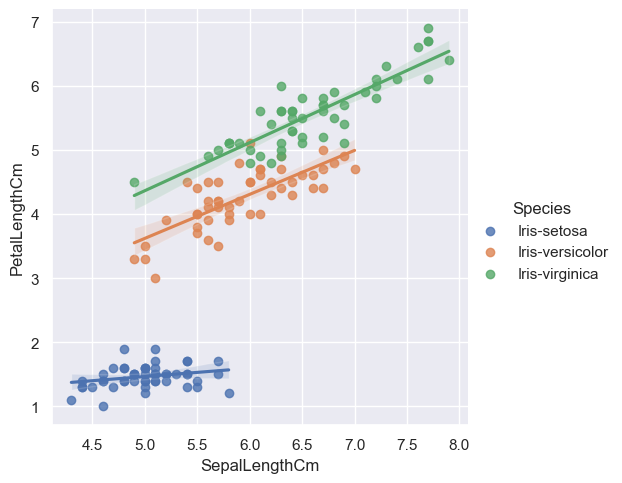

In [5]:
sns.lmplot(x='SepalLengthCm', y='PetalLengthCm', data=df_iris, hue='Species')

In [6]:
# y_hat = b1x + b0
# predict() 或 lm_model.fittedvalues 可取得 y 的預測值 (y_hat)
# 方法()為空值時, 會使用訓練資料的平均值
lm_model.predict()
# lm_model.fittedvalues

array([4.87834171, 4.87834171, 4.83742912, 4.9192543 , 4.87834171,
       5.00107948, 4.87834171, 4.9192543 , 4.87834171, 4.9192543 ,
       4.9192543 , 4.96016689, 4.87834171, 4.75560394, 4.79651653,
       4.9192543 , 4.83742912, 4.87834171, 5.00107948, 4.9192543 ,
       5.00107948, 4.9192543 , 4.71469135, 5.00107948, 5.08290466,
       4.96016689, 4.96016689, 4.9192543 , 4.87834171, 4.96016689,
       4.96016689, 4.9192543 , 4.9192543 , 4.87834171, 4.9192543 ,
       4.79651653, 4.83742912, 4.9192543 , 4.83742912, 4.9192543 ,
       4.83742912, 4.83742912, 4.83742912, 4.96016689, 5.08290466,
       4.87834171, 4.96016689, 4.87834171, 4.9192543 , 4.87834171,
       6.22845718, 6.146632  , 6.31028236, 5.94206905, 6.18754459,
       6.146632  , 6.22845718, 5.65568092, 6.18754459, 5.90115646,
       5.7375061 , 6.02389423, 5.94206905, 6.22845718, 5.77841869,
       6.10571941, 6.146632  , 5.98298164, 6.146632  , 5.90115646,
       6.26936977, 5.94206905, 6.31028236, 6.22845718, 6.06480

In [7]:
# 預設 PetalLengthCm 為 1, 2, 3 時的花萼長度期望值
lm_model.predict({'PetalLengthCm': [5, 6, 7, 8, 9, 10]})

0    6.351195
1    6.760321
2    7.169447
3    7.578573
4    7.987699
5    8.396824
dtype: float64

In [8]:
print(lm_model.params, '\n')
print('Beta0:', lm_model.params[0], '\n')
print('Beta1:', lm_model.params[1], '\n')

sepal_length = 8

predict_petal_length = lm_model.params[0] + lm_model.params[1] * sepal_length 
print('When SepalLengthCm =', sepal_length, ', Predict PetalLengthCm =', predict_petal_length)

Intercept        4.305565
PetalLengthCm    0.409126
dtype: float64 

Beta0: 4.305565456292051 

Beta1: 0.4091258984678833 

When SepalLengthCm = 8 , Predict PetalLengthCm = 7.578572644035117


## 2. 殘差分析

In [9]:
'''
在預測模型前, 我們可以先檢查模型是否適合, 這裡我們使用殘差圖 (Residual Plot) 來檢查模型是否適合
Residual = Observed value(y) - Predicted value(y_hat)
'''

beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
y_hat = beta0 + beta1 * df_iris['PetalLengthCm']
print(y_hat.head(), '\n')

# 法一: y - y_hat = 殘差
print((df_iris['SepalLengthCm'] - y_hat).head(), '\n')

# 法二: 使用 lm_model.resid 取得殘差
# residual = lm_model.resid
# print(residual.head())

0    4.878342
1    4.878342
2    4.837429
3    4.919254
4    4.878342
Name: PetalLengthCm, dtype: float64 

0    0.221658
1    0.021658
2   -0.137429
3   -0.319254
4    0.121658
dtype: float64 



### 2-1. 殘差常態性檢定

ShapiroResult(statistic=0.9929589629173279, pvalue=0.6743456125259399)


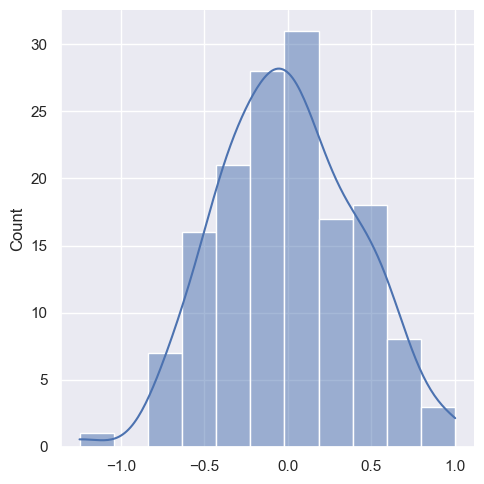

In [12]:
# 畫殘差圖, 觀察直方圖是否接近常態分佈
sns.displot(lm_model.resid, kde=True)

# shapiro.test 函式可以用來檢驗殘差的常態性
shapiro_test = stats.shapiro(lm_model.resid)
print(shapiro_test)

'''
由於虛無假設 H0: 殘差服從常態分配
因為 P-Value > 0.05, 不拒絕 H0
代表沒有足夠的證據拒絕 H0，表示統計上殘差 ~ N(mu, sigma)
'''

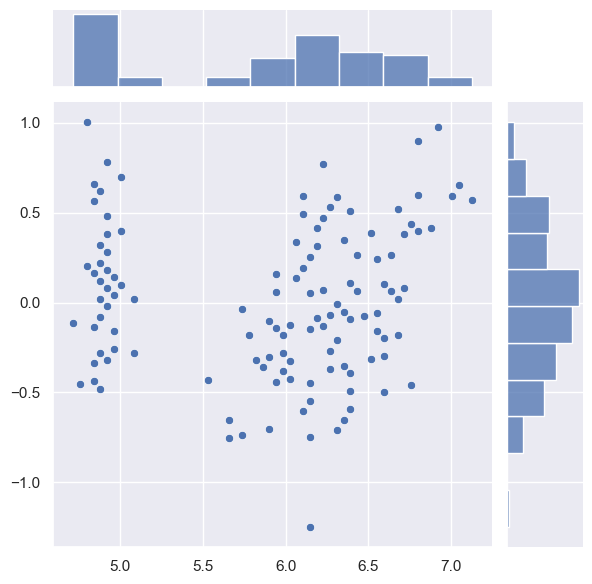

In [11]:
# 殘差的散佈圖
sns.jointplot(x=lm_model.fittedvalues, y=lm_model.resid)

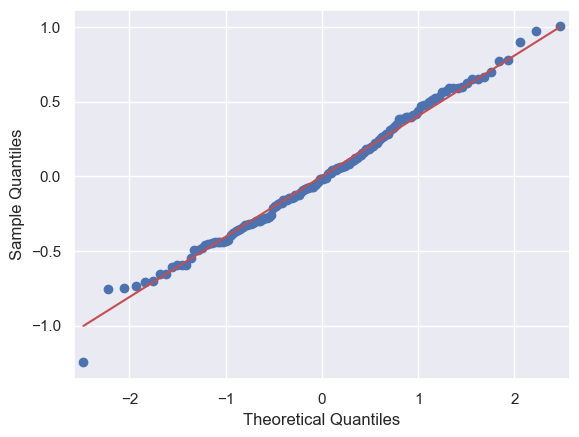

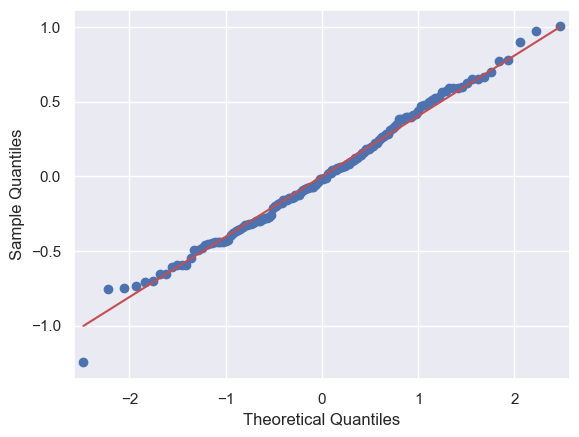

In [22]:
# QQ Plot, 檢查殘差是否接近常態分佈, 如殘差點在紅線附近, 代表殘差接近常態分佈
sm.qqplot(lm_model.resid, line='s')

### 2-2. 殘差獨立性假設檢定

In [20]:
# 要檢驗殘差的獨立性，可以使用 Durbin-Watson Test
from statsmodels.stats.stattools import durbin_watson

print(durbin_watson(lm_model.resid))

'''
Test statistic value of 0: Perfect positive autocorrelation
Test statistic value 0f 2: No autocorrelation
Test statistic value of 4: Perfect negative autocorrelation

檢定量接近 2, 表示殘差沒有自相關滿足獨立性
'''

1.867553152319513


'\nTest statistic value of 0: Perfect positive autocorrelation\nTest statistic value 0f 2: No autocorrelation\nTest statistic value of 4: Perfect negative autocorrelation\n\n檢定量接近 2, 表示殘差沒有自相關滿足獨立性\n'

### 2-3. 同質變異數假設

In [21]:
# 要檢驗殘差的變異數同質性，可以使用 Breusch–Pagan test

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

test = sms.het_breuschpagan(lm_model.resid, lm_model.model.exog)
print(lzip(name, test))

'''
H0 : 殘差變異數 does not depend on the variables in x in the form
p value > 0.05 代表統計上殘差具有同質性，符合同質變異數假設
'''

[('Lagrange multiplier statistic', 2.7295042209428244), ('p-value', 0.09850986073596181), ('f-value', 2.743024816767035), ('f p-value', 0.09979838024063187)]


'\nH0 : 殘差變異數 does not depend on the variables in x in the form\np value > 0.05 代表統計上殘差具有同質性，符合同質變異數假設\n'

## 3. 判定係數

In [21]:
'''
判定係數(R-squared) 用來評估迴歸模型的解釋力, 介於 0 ~ 1 之間, 越大越好.
R-squared = SSR / SST = 1 - SSE / SST
表示模型可預測的變異量佔總變異量的比例, 越大表示模型越適合.
'''

mu = np.mean(df_iris['SepalLengthCm'])
y = df_iris['SepalLengthCm']
y_hat = lm_model.predict()

print('R-squqred = ', np.sum((y_hat - mu)**2) / np.sum((y - mu)**2))

# 法二 lm_model.rsquared 直接取得判定係數
print('R-squqred = ', lm_model.rsquared, '\n')

'''
調整後判定係數 (Adjusted R-squared), 透過自由度修正後的判定係數, 來避免過度擬合 (Overfitting)
Adjusted R-squared = 1 - (1 - R-squared) * (n - 1) / (n - k - 1)
n: 資料筆數, k: 解釋變數個數
'''

n = len(df_iris)
k = 1
print('Adjusted R-squqred = ', 1 - (1 - lm_model.rsquared) * (n - 1) / (n - k - 1))

# 法二 lm_model.rsquared_adj 直接取得調整後判定係數
print('Adjusted R-squqred = ', lm_model.rsquared_adj)


R-squqred =  0.7599553107783255
R-squqred =  0.7599553107783261 

Adjusted R-squqred =  0.758333387202504
Adjusted R-squqred =  0.758333387202504
